# Examining racial disparities in police killings 
## Yuan Meng
October 26, 2019

**_(I also wrote this report as a Medium story, which you can find [here](https://medium.com/@yuanmeng_37677/are-there-racial-disparities-in-police-killings-b6d738c67cfd)!)_**

On October 12, 2019, Atatiana Jefferson's neighbor called the Dallas police; he heard noises and suspected a break-in. When officer Aaron Dean arrived, he shot and killed Jefferson without finishing his warning. The 28-year-old Black woman had done nothing but playing video games with her nephew that night. Not long ago, another Dallas officer Amber Guyger went back to the wrong apartment after work and shot her neighbor Botham Jean, whom she mistook for an intruder. The 26-year-old Black man was unarmed and given no chance to explain. **Were the victims not Black, would she have been killed?** After every tragedy, this question begs for an answer. 

We can't travel back in time and alter the victim's race to see if it changes the outcome. However, we might spot potential racial biases by **examining whether each race's police killings are proportional to its population**. The logic goes like this: If police encounters are truly random, then the "encounter rate" of each race should just be its base rate; if the police were race-blind using lethal force, each race should have the same death rate during these encounters. If both assumptions were true, then dividing any race's police killings by its population should give us the same result. If there are racial disparities overall, we can zoom in on fine-grained patterns across different genders and ages.

Even if we find racial disparities, people can still argue they were driven by factors other than race. For instance, African Americans may be more threatening during police encounters than Whites and perhaps this, not their race, leads to higher risk of deaths. If it were true, racial disparities should decrease in less threatening scenarios. I will test this prediction. 

Lastly, as you might be wondering, was it a mere coincidence that both officers in the stories are from Dallas or does Dallas actually have high racial disparities in police killings? To answer questions like this, we can compare racial disparities across the United States to see in which states they are at the extremes.

## Questions

To sum up, I will explore the following three questions in this project:
1. **Who were the police more likely to kill?** 
- Which races have the highest death rates from police killing compare to base rates? 
- How does the above result differ across genders and ages?
2. **Why were the police more likely to kill them?** *For being more threatening?*
- Were African American victims more threatening during police encounters?
- Were African Americans who didn't pose threats still more likely to be killed by the police?
3. **Where are racial disparities at the extremes?**
- In which states does each race have the highest death rates compared to base rates?

## Data
Official data on police killings are surprisingly sparse. After years of urging from the U.S. Congress, the FBI finally compiled the [National Use-of-Force Data Collection](https://www.fbi.gov/services/cjis/ucr/use-of-force) but hasn't made it public. Volunteers, on the other hand, have collected huge amounts of police killing data from crowdsourced reports and public homicide records; the largest three are [Fatal Encounters (FE)](https://fatalencounters.org/), [the U.S. Police Shootings Database](https://docs.google.com/spreadsheets/d/1cEGQ3eAFKpFBVq1k2mZIy5mBPxC6nBTJHzuSWtZQSVw/edit#gid=1144428085), and [Killed by Police](https://killedbypolice.net/). While these databases have many records (e.g., FE has 26,830 records since 2000), they lack information about the circumstances of the killings, such as whether the civilian was armed, showed any signs of mental illness, fled from the police, and so on. Several journalist-maintained datasets (e.g., [Mapping Police Violence](https://mappingpoliceviolence.org/), [The Guardian](https://www.theguardian.com/us-news/ng-interactive/2015/jun/01/the-counted-police-killings-us-database), [VICE News](https://news.vice.com/en_us/article/a3jjpa/nonfatal-police-shootings-data), and [The Washington Post](https://github.com/washingtonpost/data-police-shootings)) filled in on these details using various sources such as news reports, social media, or records requested from police departments.

For my analysis, I will use the **Mapping Police Violence** dataset. The Guardian and VICE News haven't updated their data since 2016 and The Washington Post only has shooting data. Not only is Mapping Police Violence reasonably update-to-date (2013-2018) but it also includes all means of police killings. To see whether some races are overrepresented in police killings, I obtained each race's state-level population from the 2017 **[Population Distribution by Race/Ethnicity](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?dataView=1&currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)** dataset. The racial makeup of each state has barely changed over the past 5 years (see this [10-year trend](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?dataView=0&activeTab=graph&currentTimeframe=0&startTimeframe=9&selectedDistributions=white&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)).

In [457]:
# Load the data science toolkit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Use FiveThirtyEight-style plots
import matplotlib.style as style
style.use('fivethirtyeight')
# Detect encoding method (in case)
import chardet
# Calculate correlation 
from scipy.stats import pearsonr

Let's load both datasets and take a look at what's in them.

In [458]:
# Load Mapping Police Violence 
data = pd.read_csv('police_killings.csv')
data.replace('', np.nan, inplace=True) # Replace empty cells with NaN

In [459]:
# Take a look at the first two rows
data.head(2)

,name,age,sex,race,date,city,state,zipcode,county,agency,...,disposition,criminal_charges,mental_illness,armed,weapon,threat_level,fleeing,body_cam,WaPo_id,Unnamed: 20
0,Iosia Faletogo,30,Male,Pacific Islander,12/31/18,Seattle,WA,98103.0,King,Seattle Police Department,...,Pending investigation,No known charges,No,Allegedly Armed,gun,attack,Foot,No,4332.0,NaN
1,Name withheld by police,NaN,Male,Unknown race,12/31/18,Van Nuys,CA,91405.0,Los Angeles,Los Angeles Police Department,...,Pending investigation,No known charges,No,Allegedly Armed,knife,other,Not fleeing,Yes,4340.0,NaN


In [460]:
# Drop the last column that doesn't seem useful
data = data.drop(data.columns[-1],axis=1) 
# Replace "Unknown Race" with "Unknown race", which refer to the same group
data['race'].replace('Unknown Race', 'Unknown race', inplace=True)

In [461]:
# Take a look again
data.head(2)

,name,age,sex,race,date,city,state,zipcode,county,agency,causal_of_death,disposition,criminal_charges,mental_illness,armed,weapon,threat_level,fleeing,body_cam,WaPo_id
0,Iosia Faletogo,30,Male,Pacific Islander,12/31/18,Seattle,WA,98103.0,King,Seattle Police Department,Gunshot,Pending investigation,No known charges,No,Allegedly Armed,gun,attack,Foot,No,4332.0
1,Name withheld by police,NaN,Male,Unknown race,12/31/18,Van Nuys,CA,91405.0,Los Angeles,Los Angeles Police Department,Gunshot,Pending investigation,No known charges,No,Allegedly Armed,knife,other,Not fleeing,Yes,4340.0


In [462]:
# How many records?
print("This dataset has {} records and {} columns.".format(len(data), len(data.columns)))

This dataset has 6847 records and 20 columns.


The Mapping Police Violence data has documented 6297 cases of police killings, each with 20 columns detailing the victim's name, demographics, time and location of killing, and circumstances of the killing, along with other information. In subsequent analyses, I will focus on the following 3 aspects and 8 variables:
1. Demographics of victims: `race`, `sex`, `age`
2. Location of killings: `state`
3. Circumstances of killings:
   - Whether the victim was armed (`armed`): Allegedly armed, unarmed, vehicle, unclear.
   - Whether the victim showed signs of mental illness (`mental_illness`): No, yes, drug or alchool use, unknown.
   - Whether the victim was fleeing from the police (`fleeing`): Not fleeing, car, foot, other.
   - Whether the victim was threatening the police (`threat_level`): Attack, undetermined, other.

In [463]:
# Load Population Distribution by Race/Ethnicity data
demo = pd.read_csv('demo_race.csv')
demo.replace('', np.nan, inplace=True) # Replace empty cells with NaN
# Look at first two rows
demo.head(2)

,state,white_pop,black_pop,hispanic_pop,asian_pop,native_pop,islander_pop,other_pop,state_pop
0,AK,3119100,1259900,195700,63800,19800.0,NaN,81800,4741400
1,AL,433000,18000,47400,46600,95500.0,6300.0,63300,710100


The 2017 Population Distribution by Race/Ethnicity dataset shows each race's population (Whites, Blacks, Hispanics, Asians, Native Americans, Pacific Islanders, and other races) in each of the 51 states (including District of Columbia) in the United States.

## Are Blacks are likely to be killed by the police?
### Risk of death by race

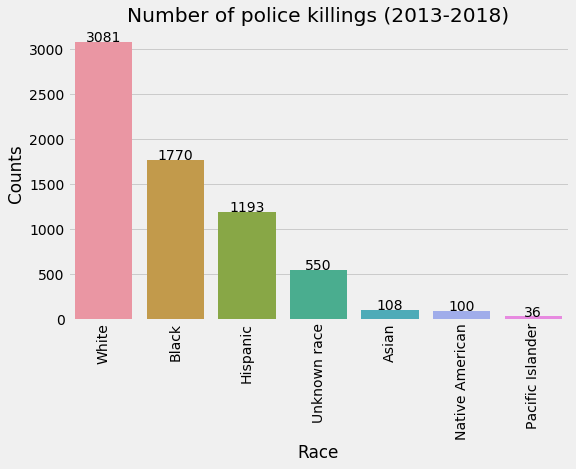

In [464]:
# Set figure size
plt.figure(figsize=(8,5))
# Plot each race's death count in descending order
graph = sns.countplot(x='race', 
                      data=data,
                      order = data['race'].value_counts().index)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
# Add count to each bar
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height,
        data['race'].value_counts()[i],ha="center")
    i += 1
# Title + labels
plt.title("Number of police killings (2013-2018)")
plt.xlabel('Race')
plt.ylabel('Counts')

plt.show()

A total of 3081 White Americans were killed by the police between 2013 and 2018, which is more than any other races and nearly twice as many as Blacks (1770 killed). However, the absolute number of deaths means little since each race has a different base rate in the population. If police killings are strictly blind to race, then 5 times as many Whites as Blacks would be killed (Blacks and Whites make up about 12% and 60% of the U.S. population, respectively) — rather than equally as many or twice as many (as shown in the graph).

To correct for base rate differences, we can divide each race's number of deaths by its national population. Since this number would be too small to visualize, we can multiple it by a million and see how many per million were killed by the police. (Since "Unknown race" and "other" could refer to different groups in the police killing and the demographic data, I will drop these categories.)

In [465]:
# Calculate each race's number of deaths per million people in the US
white_per_million = len(data.loc[data['race'] == 'White'])/demo['white_pop'].sum() * 1e7
black_per_million = len(data.loc[data['race'] == 'Black'])/demo['black_pop'].sum() * 1e7
hispanic_per_million = len(data.loc[data['race'] == 'Hispanic'])/demo['hispanic_pop'].sum() * 1e7
asian_per_million = len(data.loc[data['race'] == 'Asian'])/demo['asian_pop'].sum() * 1e7
native_per_million = len(data.loc[data['race'] == 'Native American'])/demo['native_pop'].sum() * 1e7
islander_per_million = len(data.loc[data['race'] == 'Pacific Islander'])/demo['islander_pop'].sum() * 1e7
# Store results as a Pandas Series
per_million = pd.Series([white_per_million, black_per_million, hispanic_per_million, asian_per_million, native_per_million, islander_per_million],
                        index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Pacific Islander'])

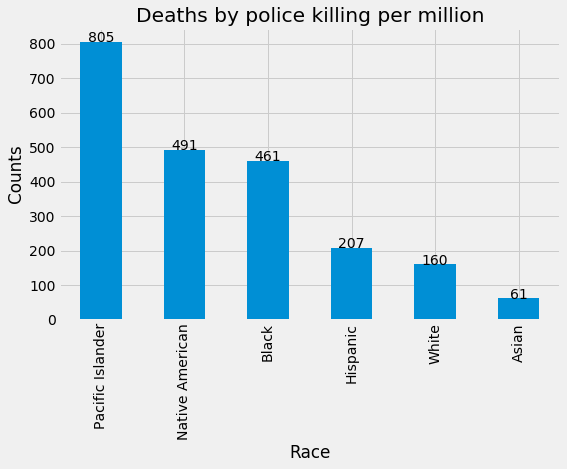

In [466]:
# Set figure size
plt.figure(figsize=(8,5))
# Plot each race's deaths per million in descending order
graph1 = per_million.sort_values(ascending=False).plot(kind='bar')
# Add count to each bar
graph1.set_xticklabels(graph1.get_xticklabels(), rotation=90)
i=0
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height,
               per_million.sort_values(ascending=False).round(0).astype(int)[i],ha="center")
    i += 1
# Title + labels
plt.xlabel('Race')
plt.ylabel('Counts')
plt.title('Deaths by police killing per million')

plt.show()

About 805 per million Pacific Islanders were killed by the police, which is the highest among all races. However, since there are only 36 records of Pacific Islanders, we don't know if this result can reflect their actual risk of being killed by the police. For this concern, I will leave out Pacific Islanders in analyses using the deaths per million measure. Right after Pacific Islanders, Native Americans and Blacks have the highest number of deaths per million (491 and 461, respectively). By comparison, only about 1/3 as many Whites per million were killed by the police. These disparities suggest that overall, Blacks and other racial minorities like Native Americans are indeed more likely than Whites to become victims of police killings. 

### Risk of death by race and age

How does the risk of getting killed by the police change with age? Does the pattern differ for each race? Below I will look at how deaths per million vary with age across different races.

In [467]:
# Covert age to numeric
data['age'] = data['age'].fillna('') 
data['age'] = [age.replace('s', '') for age in data['age']]
data['age'] = pd.to_numeric(data['age'], errors='coerce')
# Create a data frame where each row is a age and each column a race
age = pd.crosstab(data['age'], data['race'])
age['age'] = age.index
# Drop Pacific Islanders and unknown races
age = age.drop(['Pacific Islander', 'Unknown race'], axis=1)

In [468]:
# To plot with Seaborn, convert wide format to long format 
age_long = pd.melt(age,id_vars="age",var_name='race', value_name='counts')
# Compute deaths per million people for each age in each race
age_long['death_per_million'] = ""
age_long.loc[age_long['race'] == 'White', 'death_per_million'] = age_long.loc[age_long['race'] == 'White', 'counts']/demo['white_pop'].sum() * 1e7
age_long.loc[age_long['race'] == 'Black', 'death_per_million'] = age_long.loc[age_long['race'] == 'Black', 'counts']/demo['black_pop'].sum() * 1e7
age_long.loc[age_long['race'] == 'Hispanic', 'death_per_million'] = age_long.loc[age_long['race'] == 'Hispanic', 'counts']/demo['hispanic_pop'].sum() * 1e7
age_long.loc[age_long['race'] == 'Asian', 'death_per_million'] = age_long.loc[age_long['race'] == 'Asian', 'counts']/demo['asian_pop'].sum() * 1e7
age_long.loc[age_long['race'] == 'Native American', 'death_per_million'] = age_long.loc[age_long['race'] == 'Native American', 'counts']/demo['native_pop'].sum() * 1e7
# Convert age and deaths per million to floats
age_long['age'] = age_long['age'].astype(float)
age_long['death_per_million'] = age_long['death_per_million'].astype(float)

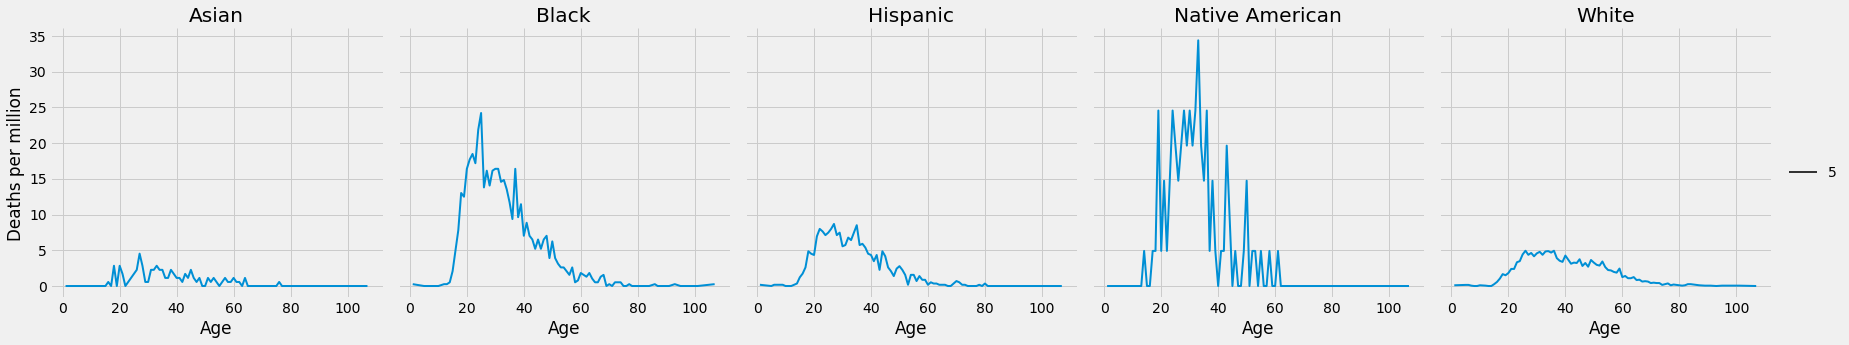

In [469]:
# Plot each race in a separate facetgrid
g = sns.relplot(x="age", y="death_per_million", col="race",
                size=5, aspect=1, facet_kws=dict(sharex=True),
                kind="line", legend="full", data=age_long)
# Change label of each facetgrid
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("Black")
axes[2].set_title("Hispanic")
axes[3].set_title("Native American")
axes[4].set_title("White")
# Change x-axis label
for ax in axes:
    ax.set_xlabel("Age")
# Change y-axis label 
for ax in axes:
    ax.set_ylabel("Deaths per million")

plt.show()

In [470]:
# Peak age of Black killed per million
max_deaths_id = age_long.loc[age_long['race'] == 'Black','death_per_million'].idxmax(axis=0, skipna=True)
max_age = age_long['age'].iloc[max_deaths_id]
max_deaths = age_long['death_per_million'].iloc[max_deaths_id]
print("At age {}, {} per million Blacks are killed by the police.".format(max_age.round(0).astype(int), max_deaths.round(0).astype(int)))

At age 25, 24 per million Blacks are killed by the police.


Across all ages, more per million Native Americans and Blacks were killed than the other races. Disparities between Whites and Blacks exist across the entire age spectrum and are most extreme between age 18 and 40 when Blacks are particularly vulnerable to police killing. At the peak age 25, 24 per million Blacks were killed whereas the number for Whites never reaches 5 per million. 

### Risk of death by gender and race

Let's take a closer look at each race's deaths per million by gender. (Because there are only 6 documented deaths of transgender people, I will focus on males and females in this analysis.)

In [471]:
data['sex'].value_counts()

Male           6428
Female          400
Transgender       6
Unknown           4
Name: sex, dtype: int64

In [472]:
# Create a data frame where each row is a gender and each column a race
gender = pd.crosstab(data['sex'], data['race'])
gender = gender.iloc[0:2]
# Only select Whites, Blacks, Hispanics, and Asians
gender = gender.drop(['Pacific Islander', 'Unknown race'], axis=1)
# To plot with Seaborn, convert wide format to long format 
gender['Gender'] = gender.index
gender_long = pd.melt(gender,id_vars="Gender",var_name='race', value_name='counts')
# Compute deaths per million people for each age in each race
gender_long['death_per_million'] = ""
gender_long.loc[gender_long['race'] == 'Asian', 'death_per_million'] = gender_long.loc[gender_long['race'] == 'Asian', 'counts']/demo['asian_pop'].sum() * 1e7
gender_long.loc[gender_long['race'] == 'Black', 'death_per_million'] = gender_long.loc[gender_long['race'] == 'Black', 'counts']/demo['black_pop'].sum() * 1e7
gender_long.loc[gender_long['race'] == 'Hispanic', 'death_per_million'] = gender_long.loc[gender_long['race'] == 'Hispanic', 'counts']/demo['hispanic_pop'].sum() * 1e7
gender_long.loc[gender_long['race'] == 'White', 'death_per_million'] = gender_long.loc[gender_long['race'] == 'White', 'counts']/demo['white_pop'].sum() * 1e7
gender_long.loc[gender_long['race'] == 'Native American', 'death_per_million'] = gender_long.loc[gender_long['race'] == 'Native American', 'counts']/demo['native_pop'].sum() * 1e7

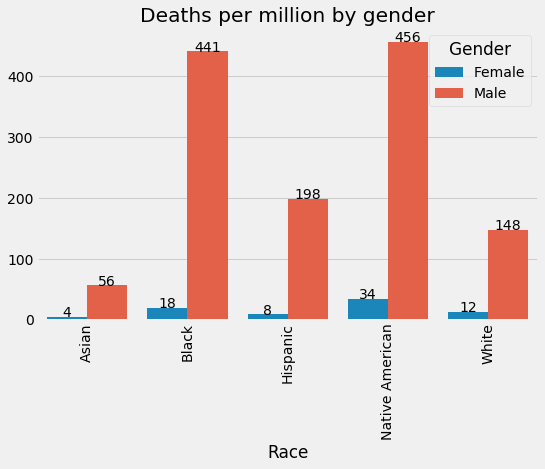

In [473]:
# Set figure size
plt.figure(figsize=(8,5))
# Death per million
graph3 = sns.barplot(x="race", y="death_per_million", hue="Gender", data=gender_long)
# Deaths per millions ranked by gender
deaths_female = gender_long.loc[gender_long['Gender'] == 'Female', 'death_per_million']
deaths_male = gender_long.loc[gender_long['Gender'] == 'Male', 'death_per_million']
deaths = pd.concat([deaths_female, deaths_male]).astype(int).tolist()
# Add count to each bar
graph3.set_xticklabels(graph3.get_xticklabels(), rotation=90)
i=0
for p in graph3.patches:
    height = p.get_height()
    graph3.text(p.get_x()+p.get_width()/2., height, deaths[i],ha="center")
    i += 1
# Title + labels
plt.title('Deaths per million by gender')
plt.xlabel('Race')
plt.ylabel('')

plt.show()

Across all races, more per million males than females were killed by the police. Disparities between Blacks and Whites exist in both genders, albeit to a less degree among females: With every White female killed, there were 1.56 Black females killed; with every White male killed, there were 2.98 Black males killed.

## Why were Blacks more likely to be killed than Whites?
### Threatening behaviors by race

In [474]:
# Drop unknown races
data = data[(data['race']!= 'Unknown race')]
# Proportion of each race being armed
armed = pd.crosstab(data['race'], data['armed'])
armed['armed_rate'] = armed['Allegedly Armed']/armed.sum(axis=1)
# Proportion of each race showing signs of mental illness
mental_illness = pd.crosstab(data['race'], data['mental_illness'])
mental_illness['mental_illness_rate'] = mental_illness['Yes']/mental_illness.sum(axis=1)
# Proportion of each race fleeing from the police
fleeing = pd.crosstab(data['race'], data['fleeing'])
fleeing['fleeing_rate'] = 1 - fleeing['Not fleeing']/fleeing.sum(axis=1)
# Proportion of each race attacking the police
attack = pd.crosstab(data['race'], data['threat_level'])
attack['attack_rate'] = attack['attack']/attack.sum(axis=1)
# Sort from large to small
armed = armed.sort_values(['armed_rate'])[::-1].reset_index(drop=False)
mental_illness = mental_illness.sort_values(['mental_illness_rate'])[::-1].reset_index(drop=False)
fleeing = fleeing.sort_values(['fleeing_rate'])[::-1].reset_index(drop=False)
attack = attack.sort_values(['attack_rate'])[::-1].reset_index(drop=False)

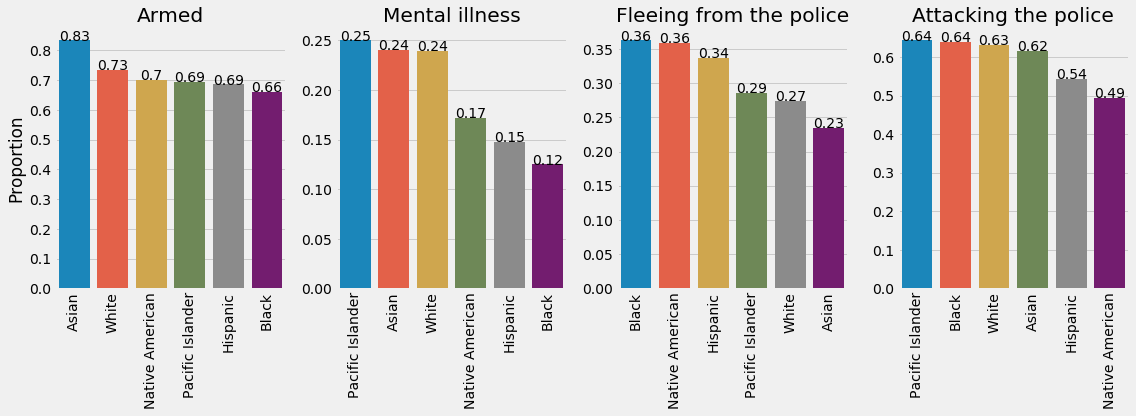

In [475]:
# Plot each of the 4 results
plt.figure(figsize=(16, 6))
# Being Armed
plt.subplot(1, 4, 1)
graph1 = sns.barplot(x="race", y="armed_rate", data=armed)
graph1.set_xticklabels(graph1.get_xticklabels(), rotation=90)
i=0
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height,
               armed['armed_rate'].round(2)[i],ha="center")
    i += 1
plt.title("Armed")
plt.xlabel("")
plt.ylabel("Proportion")

# Signs of mental illness
plt.subplot(1, 4, 2)
graph2 = sns.barplot(x="race", y="mental_illness_rate", data=mental_illness)
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
i=0
for p in graph2.patches:
    height = p.get_height()
    graph2.text(p.get_x()+p.get_width()/2., height,
               mental_illness['mental_illness_rate'].round(2)[i],ha="center")
    i += 1
plt.title("Mental illness")
plt.xlabel("")
plt.ylabel("")

# Fleeing
plt.subplot(1, 4, 3)
graph3 = sns.barplot(x="race", y="fleeing_rate", data=fleeing)
graph3.set_xticklabels(graph3.get_xticklabels(), rotation=90)
i=0
for p in graph3.patches:
    height = p.get_height()
    graph3.text(p.get_x()+p.get_width()/2., height,
               fleeing['fleeing_rate'].round(2)[i],ha="center")
    i += 1
plt.title("Fleeing from the police")
plt.xlabel("")
plt.ylabel("")

# Attacking the police
plt.subplot(1, 4, 4)
graph4 = sns.barplot(x="race", y="attack_rate", data=attack)
graph4.set_xticklabels(graph4.get_xticklabels(), rotation=90)
i=0
for p in graph4.patches:
    height = p.get_height()
    graph4.text(p.get_x()+p.get_width()/2., height,
               attack['attack_rate'].round(2)[i],ha="center")
    i += 1
plt.title("Attacking the police")
plt.xlabel("")
plt.ylabel("")

# Nicer spaing
plt.tight_layout()
plt.show()

Among all races, Blacks were the least likely to carry arms or show signs of mental illness. A higher proportion of Blacks were fleeing from the police than any other races. This behavior, however, is tricky to interpret: Did the police kill more Blacks because more of them fled or did more Blacks flee because they feared for harsher consequences? We can ignore this ambiguous measure for now. While a higher proportion of Blacks attacked the police than Whites, the difference (64% vs. 63%) is too small to explain why Blacks were far more likely to be killed than Whites. 

### Deaths in non-threatening civilians by race
The relationship between threatening behaviors and police killings is vague and indirect. To better understand what drives racial disparities, we can look at less threatening situations: If police killings were driven by threatening behaviors, then each race should have the same deaths per million among those who didn't show these behaviors. To different scenarios comparable, I will plot each race's deaths per million **relative to Whites** rather than the absolute numbers.

In [476]:
# Non-threatening civillians killed by the police
unarmed = data.loc[data['armed'] != 'Allegedly Armed']
no_attack = data.loc[data['threat_level'] != 'attack']
no_mental_illness = data.loc[data['mental_illness'] == 'No']

# Deaths relative to White 
black2white = black_per_million/white_per_million
hispanic2white = hispanic_per_million/white_per_million
asian2white = asian_per_million/white_per_million
native2white = native_per_million/white_per_million
# Store results as a Pandas Series
deaths_2white = pd.Series([black2white, hispanic2white, asian2white, native2white],
                        index = ['Black', 'Hispanic', 'Asian', 'Native American'])
# Sort from large to small
deaths_2white = deaths_2white.sort_values(ascending=False)


# Deaths per million among the unarmed 
white_unarmed = len(unarmed.loc[unarmed['race'] == 'White'])/demo['white_pop'].sum() * 1e7
black_unarmed = len(unarmed.loc[unarmed['race'] == 'Black'])/demo['black_pop'].sum() * 1e7
hispanic_unarmed = len(unarmed.loc[unarmed['race'] == 'Hispanic'])/demo['hispanic_pop'].sum() * 1e7
asian_unarmed = len(unarmed.loc[unarmed['race'] == 'Asian'])/demo['asian_pop'].sum() * 1e7
native_unarmed = len(unarmed.loc[unarmed['race'] == 'Native American'])/demo['native_pop'].sum() * 1e7
# Deaths relative to Whites
black2white_unarmed = black_unarmed/white_unarmed
hispanic2white_unarmed = hispanic_unarmed/white_unarmed
asian2white_unarmed = asian_unarmed/white_unarmed
native2white_unarmed = native_unarmed/white_unarmed
# Store results as a Pandas Series
unarmed_2white = pd.Series([black2white_unarmed, hispanic2white_unarmed, asian2white_unarmed, native2white_unarmed],
                        index = ['Black', 'Hispanic', 'Asian', 'Native American'])
# Sort from large to small
unarmed_2white = unarmed_2white.sort_values(ascending=False)

# Deaths per million among those who didn't attack
white_no_attack = len(no_attack.loc[no_attack['race'] == 'White'])/demo['white_pop'].sum() * 1e7
black_no_attack = len(no_attack.loc[no_attack['race'] == 'Black'])/demo['black_pop'].sum() * 1e7
hispanic_no_attack = len(no_attack.loc[no_attack['race'] == 'Hispanic'])/demo['hispanic_pop'].sum() * 1e7
asian_no_attack = len(no_attack.loc[no_attack['race'] == 'Asian'])/demo['asian_pop'].sum() * 1e7
native_no_attack = len(no_attack.loc[no_attack['race'] == 'Native American'])/demo['native_pop'].sum() * 1e7
islander_no_attack = len(no_attack.loc[no_attack['race'] == 'Pacific Islander'])/demo['islander_pop'].sum() * 1e7
# Deaths relative to Whites
black2white_no_attack = black_no_attack/white_no_attack
hispanic2white_no_attack = hispanic_no_attack/white_no_attack
asian2white_no_attack = asian_no_attack/white_no_attack
native2white_no_attack = native_no_attack/white_no_attack
# Store results as a Pandas Series
no_attack_2white = pd.Series([black2white_no_attack, hispanic2white_no_attack, asian2white_no_attack, native2white_no_attack],
                        index = ['Black', 'Hispanic', 'Asian', 'Native American'])
# Sort from large to small
no_attack_2white = no_attack_2white.sort_values(ascending=False)

# Deaths per million among those who showed no signs of mental illness
white_no_mental_illness = len(no_mental_illness.loc[no_mental_illness['race'] == 'White'])/demo['white_pop'].sum() * 1e7
black_no_mental_illness = len(no_mental_illness.loc[no_mental_illness['race'] == 'Black'])/demo['black_pop'].sum() * 1e7
hispanic_no_mental_illness = len(no_mental_illness.loc[no_mental_illness['race'] == 'Hispanic'])/demo['hispanic_pop'].sum() * 1e7
asian_no_mental_illness = len(no_mental_illness.loc[no_mental_illness['race'] == 'Asian'])/demo['asian_pop'].sum() * 1e7
native_no_mental_illness = len(no_mental_illness.loc[no_mental_illness['race'] == 'Native American'])/demo['native_pop'].sum() * 1e7
islander_no_mental_illness = len(no_mental_illness.loc[no_mental_illness['race'] == 'Pacific Islander'])/demo['islander_pop'].sum() * 1e7
# Deaths relative to Whites
black2white_no_mental_illness = black_no_mental_illness/white_no_mental_illness
hispanic2white_no_mental_illness = hispanic_no_mental_illness/white_no_mental_illness
asian2white_no_mental_illness = asian_no_mental_illness/white_no_mental_illness
native2white_no_mental_illness = native_no_mental_illness/white_no_mental_illness
# Store results as a Pandas Series
no_mental_illness_2white = pd.Series([black2white_no_mental_illness, hispanic2white_no_mental_illness, asian2white_no_mental_illness, native2white_no_mental_illness],
                        index = ['Black', 'Hispanic', 'Asian', 'Native American'])
# Sort from large to small
no_mental_illness_2white = no_mental_illness_2white.sort_values(ascending=False)

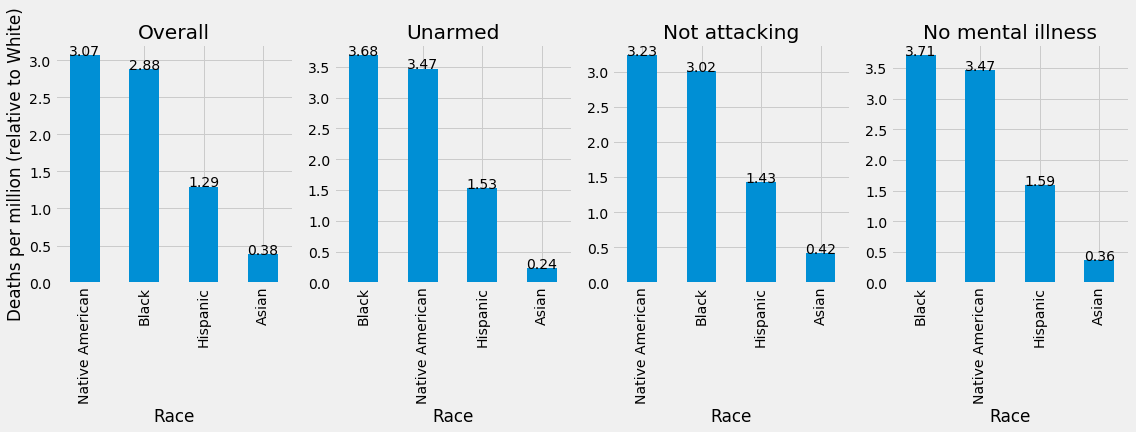

In [477]:
# Plot result
plt.figure(figsize=(16, 6))

# Overall (same as before)
plt.subplot(1, 4, 1)
graph1 = deaths_2white.plot(kind='bar')
graph1.set_xticklabels(graph1.get_xticklabels(), rotation=90)
i=0
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height,
               deaths_2white.round(2)[i],ha="center")
    i += 1
plt.xlabel('Race')
plt.ylabel('Deaths per million (relative to White)')
plt.title('Overall')

# Unarmed
plt.subplot(1, 4, 2)
graph2 = unarmed_2white.plot(kind='bar')
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
i=0
for p in graph2.patches:
    height = p.get_height()
    graph2.text(p.get_x()+p.get_width()/2., height,
               unarmed_2white.round(2)[i],ha="center")
    i += 1
plt.xlabel('Race')
plt.ylabel('')
plt.title('Unarmed')

# Not attacking
plt.subplot(1, 4, 3)
graph3 = no_attack_2white.plot(kind='bar')
graph3.set_xticklabels(graph3.get_xticklabels(), rotation=90)
i=0
for p in graph3.patches:
    height = p.get_height()
    graph3.text(p.get_x()+p.get_width()/2., height,
               no_attack_2white.round(2)[i],ha="center")
    i += 1
plt.xlabel('Race')
plt.ylabel('')
plt.title('Not attacking')

# No mental illness
plt.subplot(1, 4, 4)
graph4 = no_mental_illness_2white.plot(kind='bar')
graph4.set_xticklabels(graph4.get_xticklabels(), rotation=90)
i=0
for p in graph4.patches:
    height = p.get_height()
    graph4.text(p.get_x()+p.get_width()/2., height,
               no_mental_illness_2white.round(2)[i],ha="center")
    i += 1
plt.xlabel('Race')
plt.ylabel('')
plt.title('No mental illness')

# Nicer spaing
plt.tight_layout()
plt.show()

Racial disparities became even more extreme among civilians who were unarmed, didn't attack the police, and showed no signs of mental illness. These results suggest that racial disparities in police killings can't be explained away by Blacks showing more threatening behaviors. We need more information to determine what exactly may be driving police officers' decisions.

## Where are racial disparities the most extreme?
Let's finally look at the top 5 states with the highest racial disparities. This is measured by each race's deaths per million relative to White in each state.

In [478]:
# Drop Pacific Islanders
data = data[(data['race']!= 'Pacific Islander')]
# Number of deaths by race (columns) and state (rows)
state_deaths = pd.crosstab(data['state'], data['race'])
# Add the above to the state-level race/ethnicity data
demo = demo.merge(state_deaths, on=['state'])
# Rename these new columns as {race}_deaths
new_names = ['asian_deaths', 'black_deaths', 'hispanic_deaths', 'native_deaths', 'white_deaths']
old_names = demo.columns[9:]
demo.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [479]:
# Calculate each race's death per million 
demo['white_per_million'] = demo['white_deaths']/demo['white_pop'] * 1e7
demo['black_per_million'] = demo['black_deaths']/demo['black_pop'] * 1e7
demo['hispanic_per_million'] = demo['hispanic_deaths']/demo['hispanic_pop'] * 1e7
demo['asian_per_million'] = demo['asian_deaths']/demo['asian_pop'] * 1e7
demo['native_per_million'] = demo['native_deaths']/demo['native_pop'] * 1e7
# Calculate each race's death per million relative to White
demo['black_2white'] = demo['black_per_million']/demo['white_per_million']
demo['hispanic_2white'] = demo['hispanic_per_million']/demo['white_per_million']
demo['asian_2white'] = demo['asian_per_million']/demo['white_per_million']
demo['native_2white'] = demo['native_per_million']/demo['white_per_million']

In [480]:
# Convert two-letter codes to full names of states
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

demo['state'] = [abbrev_us_state[state] for state in demo['state']]

In [481]:
# Use state as index
demo.set_index('state', inplace=True)

In [484]:
# Top 5 Black to White
black_top10 = demo['black_2white'].sort_values(ascending=False).head(5)

# Top 5 Hispanic to White
hispanic_top10 = demo['hispanic_2white'].sort_values(ascending=False).head(5)

# Top 5 Asian to White
asian_top10 = demo['asian_2white'].sort_values(ascending=False).head(5)

# Top 5 Native American to White
native_top10 = demo['native_2white'].sort_values(ascending=False).head(5)

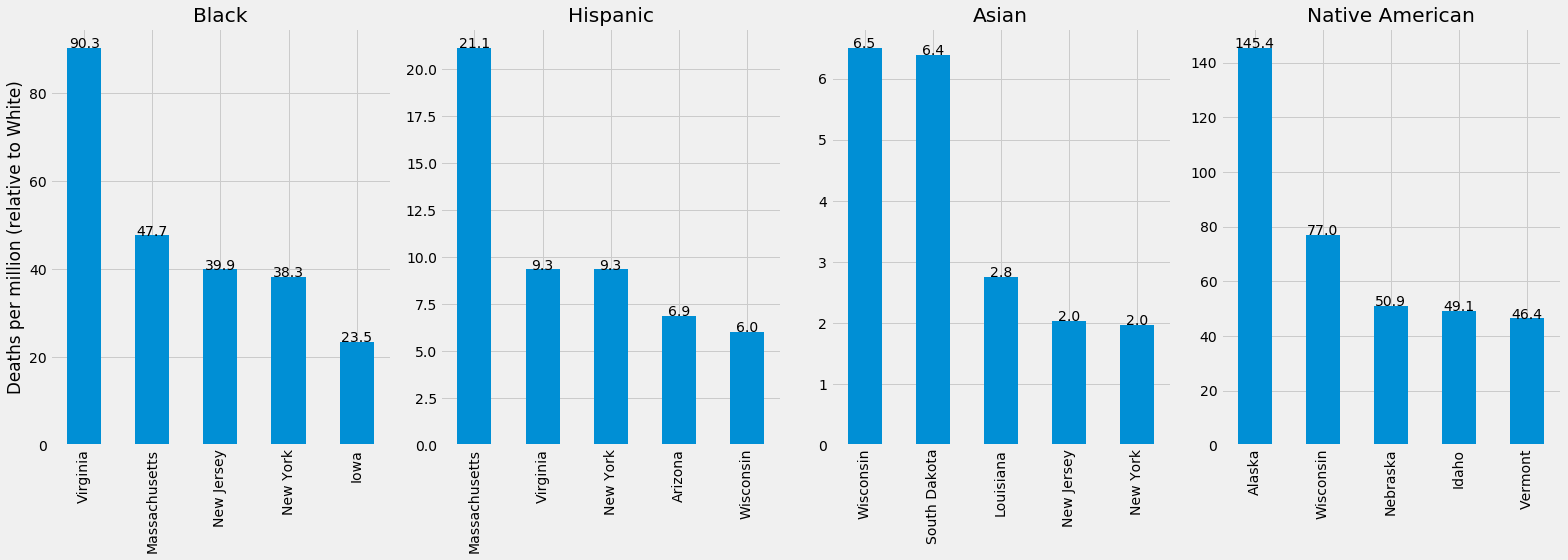

<Figure size 432x288 with 0 Axes>

In [489]:
# Plot result
plt.figure(figsize=(22, 8))
# Black
plt.subplot(1, 4, 1)
graph1 = black_top10.plot(kind='bar')
graph1.set_xticklabels(graph1.get_xticklabels(), rotation=90)
i=0
for p in graph1.patches:
    height = p.get_height()
    graph1.text(p.get_x()+p.get_width()/2., height,
               black_top10.round(1)[i],ha="center")
    i += 1
plt.xlabel('')
plt.ylabel('Deaths per million (relative to White)')
plt.title('Black')

# Hispanic
plt.subplot(1, 4, 2)
graph2 = hispanic_top10.plot(kind='bar')
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
i=0
for p in graph2.patches:
    height = p.get_height()
    graph2.text(p.get_x()+p.get_width()/2., height,
               hispanic_top10.round(1)[i],ha="center")
    i += 1
plt.xlabel('')
plt.ylabel('')
plt.title('Hispanic')

# Asian
plt.subplot(1, 4, 3)
graph3 = asian_top10.plot(kind='bar')
graph3.set_xticklabels(graph3.get_xticklabels(), rotation=90)
i=0
for p in graph3.patches:
    height = p.get_height()
    graph3.text(p.get_x()+p.get_width()/2., height,
               asian_top10.round(1)[i],ha="center")
    i += 1
plt.xlabel('')
plt.ylabel('')
plt.title('Asian')

# Native American
plt.subplot(1, 4, 4)
graph4 = native_top10.plot(kind='bar')
graph4.set_xticklabels(graph4.get_xticklabels(), rotation=90)
i=0
for p in graph4.patches:
    height = p.get_height()
    graph4.text(p.get_x()+p.get_width()/2., height,
               native_top10.round(1)[i],ha="center")
    i += 1
plt.xlabel('')
plt.ylabel('')
plt.title('Native American')

# Nicer spaing
plt.tight_layout()
plt.show()
ax.autoscale()
plt.savefig('states.png')

In states such as Virginia, Massachusetts, New Jersey, and New York, Black to White ratios in terms of deaths per million (90.3, 47.7, 39.9, and 38.3, respectively) far exceed that in the country (2.88). When pushing anti-bias training within the police force in the future, these states may need to be targeted first. It's interesting to see that some states (e.g., Wisconsin, Virginia, New York) with high disparities for one race also have high disparities for others. I'd be curious to see how biases against different racial minorities might to linked to one another.

## Summary

This project is inspired by the many innocent Black lives taken by the police, unjustified and unwarned. To examine whether Blacks are more likely to be killed by the police than Whites, I explored the Mapping Police Violence dataset, one of the most comprehensive and detailed datasets on police killings in the United States. The main findings are summarized below:

1. **Blacks are more likely to be killed by the police than Whites.** 
- Compared to Whites, 2.88 as many Blacks per million were killed by the police.
- Both Black men and women were more likely to be killed than White men and women; the discrepancy is smaller in women.
- Across the entire age spectrum, Blacks are more likely to be killed than Whites; age 18 to 40 is an especially vulnerable time for Blacks.
2. **The above disparity can't be explained by Blacks being more threatening.** 
- In general, Blacks didn't show more threatening behavior than Whites; they were the least likely to carry arms or show signs of mental illness.
- Rather than decreasing, disparities between Blacks and Whites became more extreme in unarmed civilians and those who didn't attack the police or show signs of mental illness.
3. **Disparities between Blacks and Whites are most extreme in Virgina, Massachusetts, New Jersey, and New York.**

## Future directions
All the analyses I did in this project are exploratory. Ultimately, I want to establish **causal relationships** between race and the risk of getting killed by the police. There is a long journey between showing racial disparities to making such claims. As the very first step, we need to estimate the **true prevalence** of each race's police killings from the data. As discuss, some races (e.g., Native Americans, Pacific Islanders) only have a small number of documented cases; even for Whites and Blacks, the record is incomplete. Rather than assuming the observe data represent the whole truth, we can use Bayesian statistics to obtain more rigorous estimation (Here's an [example](https://towardsdatascience.com/estimating-probabilities-with-bayesian-modeling-in-python-7144be007815) of estimating true prevalences of lions, tigers, and bears from a few encounters). Eventually, I will need **formal models of causal inference** (e.g., Pearl, 2000) to test, for instance, whether being Black indeed leads to higher risk of police killing.